In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import torch
import numpy as np

In [2]:
def show_box(box, ax, name=None):
    # print(box)
    # color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    color='red'
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor=color, facecolor=(0,0,0,0), lw=2))  
    if name:
        ax.text(x0, y0, name, color=color, fontsize=12, ha='left', va='top', bbox=dict(facecolor='black', alpha=0.5))

In [3]:
image = cv2.imread('/root/BBSEA/images/lovers_rgb.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
# model = YOLO("yolov8n.yaml") 
model = YOLO("/root/BBSEA/test/yolov8n.pt").to("cuda")  

In [5]:
results=model(image)


0: 416x640 5 persons, 132.2ms
Speed: 11.5ms preprocess, 132.2ms inference, 537.0ms postprocess per image at shape (1, 3, 416, 640)


In [22]:
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [20]:
boxes=results[0].boxes
boxes.cls

tensor([0., 0., 0., 0., 0.], device='cuda:0')

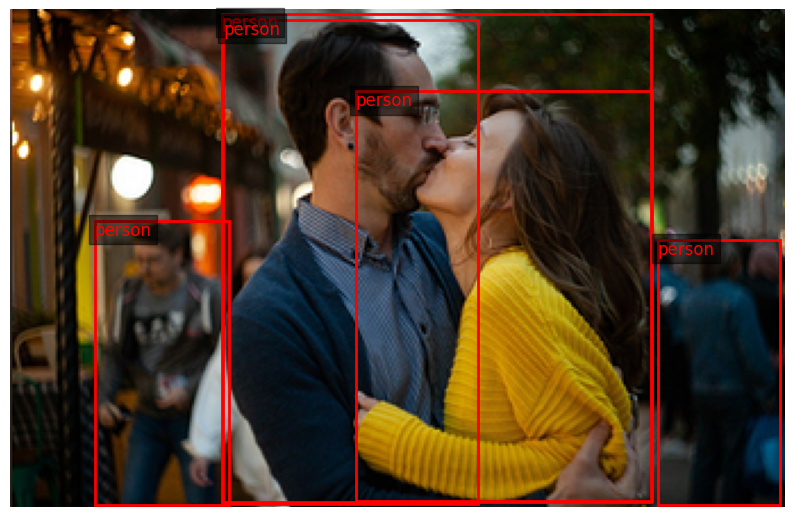

In [6]:
pred_name_map=results[0].names

plt.figure(figsize=(10, 10))
plt.imshow(image)
for box in results[0].boxes:
    xyxy=box.xyxy.squeeze().to("cpu").numpy()
    name=pred_name_map[int(box.cls.item())]
    show_box(xyxy, plt.gca(),name)
plt.axis('off')
plt.show()

In [38]:
a=torch.tensor([[1,2,3]])
print(a)
b=a.squeeze()
print(b)

tensor([[1, 2, 3]])
tensor([1, 2, 3])


In [46]:
for k in results[0].names:
    v=results[0].names[k]
    if v=="banana":
        print(k)

46


In [51]:
# View results
for r in results:
    print(r.boxes)  # print the Boxes object containing the detection bounding boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 5., 0., 0.], device='cuda:0')
conf: tensor([0.8657, 0.8455, 0.8384, 0.8267, 0.3602], device='cuda:0')
data: tensor([[4.9091e+01, 3.9977e+02, 2.4322e+02, 9.0217e+02, 8.6568e-01, 0.0000e+00],
        [6.7079e+02, 3.7739e+02, 8.0990e+02, 8.6942e+02, 8.4553e-01, 0.0000e+00],
        [1.4336e+01, 2.2570e+02, 7.9379e+02, 7.4692e+02, 8.3840e-01, 5.0000e+00],
        [2.2001e+02, 4.0559e+02, 3.4565e+02, 8.5857e+02, 8.2667e-01, 0.0000e+00],
        [0.0000e+00, 5.5149e+02, 6.2277e+01, 8.7457e+02, 3.6016e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([5, 6])
xywh: tensor([[146.1572, 650.9705, 194.1318, 502.3940],
        [740.3447, 623.4036, 139.1120, 492.0250],
        [404.0650, 486.3087, 779.4587, 521.2158],
        [282.8297, 632.0801, 125.6368, 452.9738],
        [ 31.1387, 713.0308,  62.2773, 323.0807]], device='cuda:0')
xywhn: tensor([[0.1804, 0.6028, 0.23

In [59]:
results[0].boxes.cls

tensor([0., 0., 5., 0., 0.], device='cuda:0')